<img src='logo_trybe.png'></a>

# Análise Exploratória - Case
## Open University Learning Analytics dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Informações sobre os estudantes

In [23]:
 #dataset studentInfo.csv

 studentInfo = pd.read_csv('data/studentInfo.csv', sep=',', encoding='ISO-8859-1')

In [24]:
studentInfo.sample(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
19106,DDD,2014J,694010,F,North Region,HE Qualification,NaN,0-35,0,120,N,Pass
5619,BBB,2014B,616816,F,London Region,A Level or Equivalent,30-40%,35-55,0,60,N,Withdrawn
25172,FFF,2013J,583993,M,South Region,A Level or Equivalent,80-90%,0-35,0,120,Y,Fail


In [25]:
len(studentInfo['id_student'].unique())

28785

## criando o resultado como binario

* para segundo cenário de análise de feature

In [26]:
studentInfo['final_result_2'] = studentInfo['final_result'].apply(lambda x: 'Reprovado' if (x == 'Withdrawn' or x == 'Fail') else 'Aprovado')

____
# Analisando o módulo cursado

In [27]:
studentInfo['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

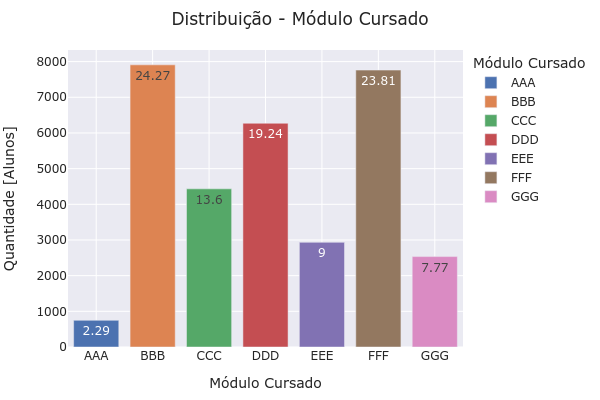

In [28]:
#plota as quantidades
modulo = studentInfo.groupby('code_module').agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_module": "Modulo", 'id_student': 'Qtde'})

modulo['Percentual'] = modulo.apply(lambda x: round(100 * (x['Qtde'] / modulo['Qtde'].sum()),2), axis=1)
    
fig = px.bar(modulo, x='Modulo', y='Qtde', \
    text='Percentual', color='Modulo',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Módulo Cursado',
    xaxis_title="Módulo Cursado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Módulo Cursado",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

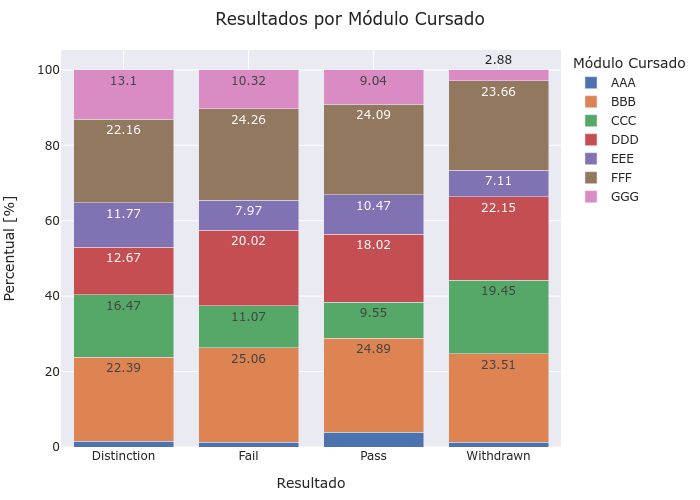

In [29]:
df = studentInfo.groupby(['code_module', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_module": "Modulo", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Modulo",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Módulo Cursado',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Módulo Cursado",
    width=700, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

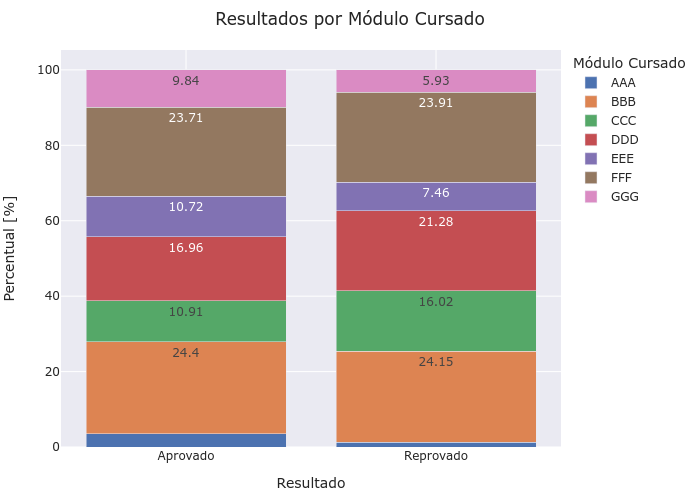

In [30]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['code_module', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_module": "Modulo", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Modulo",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Módulo Cursado',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Módulo Cursado",
    width=700, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")


____
# Analisando o período do curso

In [31]:
studentInfo['code_presentation'].unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

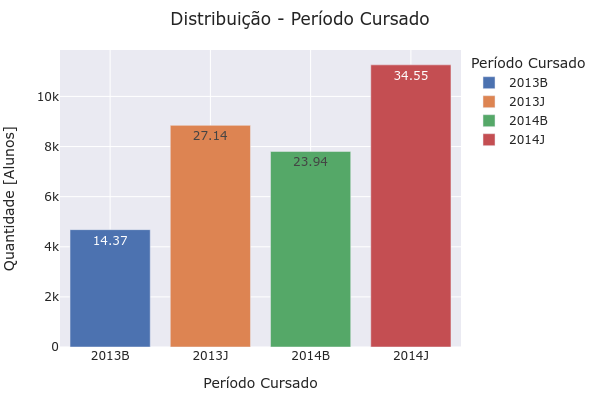

In [32]:
#plota as quantidades
periodo = studentInfo.groupby('code_presentation').agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_presentation": "Periodo", 'id_student': 'Qtde'})

periodo['Percentual'] = periodo.apply(lambda x: round(100 * (x['Qtde'] / periodo['Qtde'].sum()),2), axis=1)
    
fig = px.bar(periodo, x='Periodo', y='Qtde', \
    text='Percentual', color='Periodo',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Período Cursado',
    xaxis_title="Período Cursado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Período Cursado",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

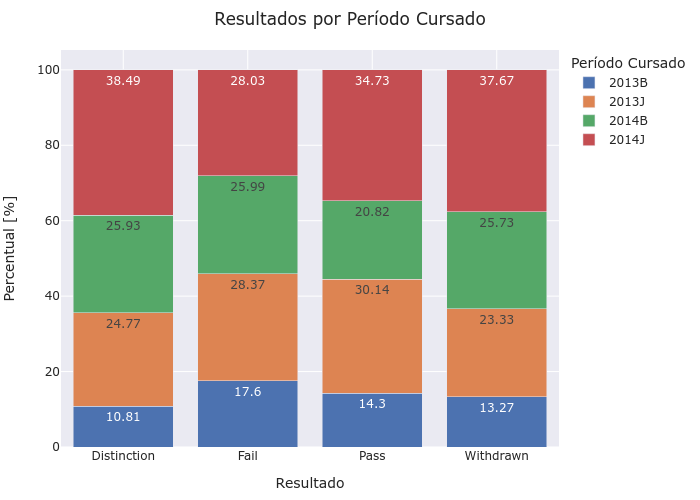

In [33]:
df = studentInfo.groupby(['code_presentation', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_presentation": "Periodo", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Periodo",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Período Cursado',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Período Cursado",
    width=700, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

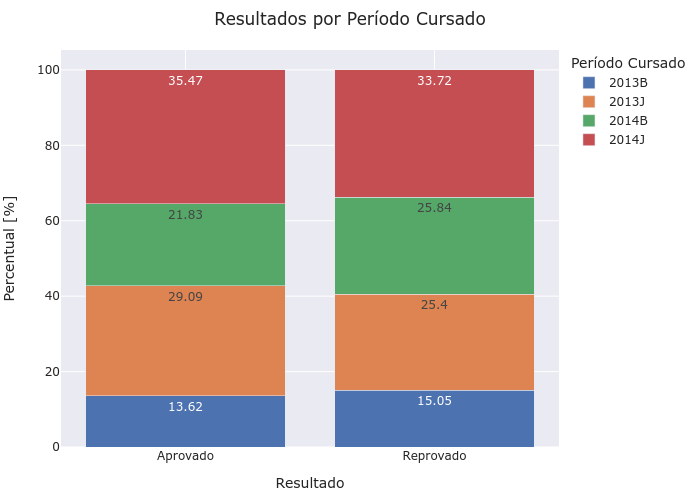

In [34]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['code_presentation', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_presentation": "Periodo", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Periodo",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Período Cursado',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Período Cursado",
    width=700, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

____
# Analisando o gênero declarado

In [35]:
studentInfo['gender'].unique()

array(['M', 'F'], dtype=object)

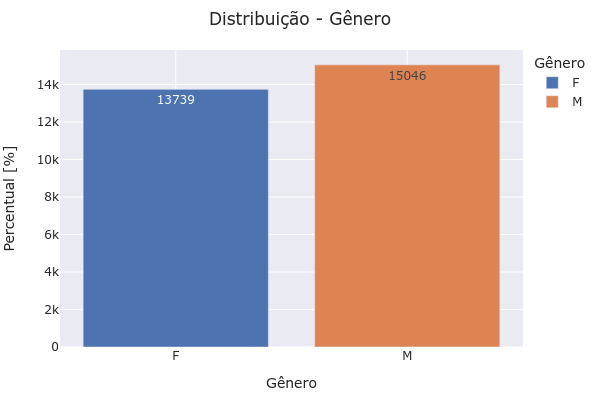

In [36]:
#plota as quantidades
genero = studentInfo[['id_student', 'gender']].drop_duplicates().groupby('gender').\
    agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", 'id_student': 'Qtde'})

genero['Percentual'] = genero.apply(lambda x: round(100 * (x['Qtde'] / genero['Qtde'].sum()),2), axis=1)
    
fig = px.bar(genero, x='Genero', y='Qtde', \
    text='Qtde', color='Genero',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Gênero',
    xaxis_title="Gênero",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

In [37]:
genero

,Genero,Qtde,Percentual
0,F,13739,47.73
1,M,15046,52.27


## Relação gẽnero e o resultado final

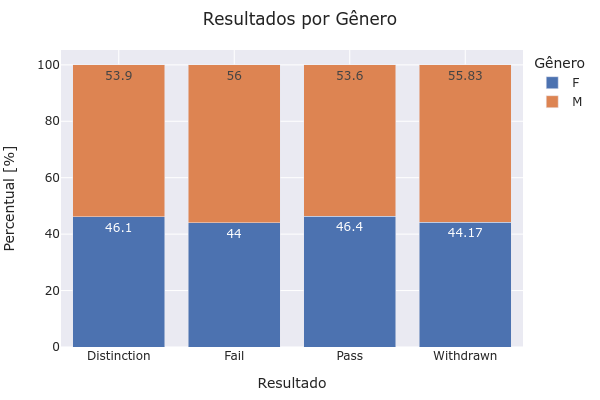

In [38]:
df = studentInfo.groupby(['gender', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Genero",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Gênero',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

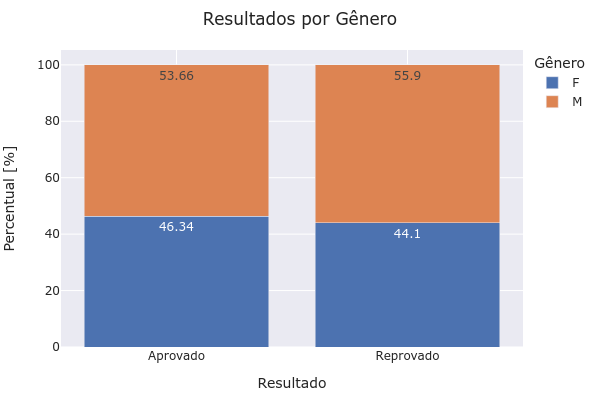

In [39]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['gender', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Genero",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Gênero',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

## Resultado gênero

* Conforme gráfico e possível notar que a proporção de Masculino e feminino se mantêm em cada grupo do resultado final.
* segundo grafico do resultado nota-se percentual binario maior no masculino

____
# Analisando a Região de origem do estudante


In [40]:
studentInfo['region'].unique()

array(['East Anglian Region', 'Scotland', 'North Western Region',
       'South East Region', 'West Midlands Region', 'Wales',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

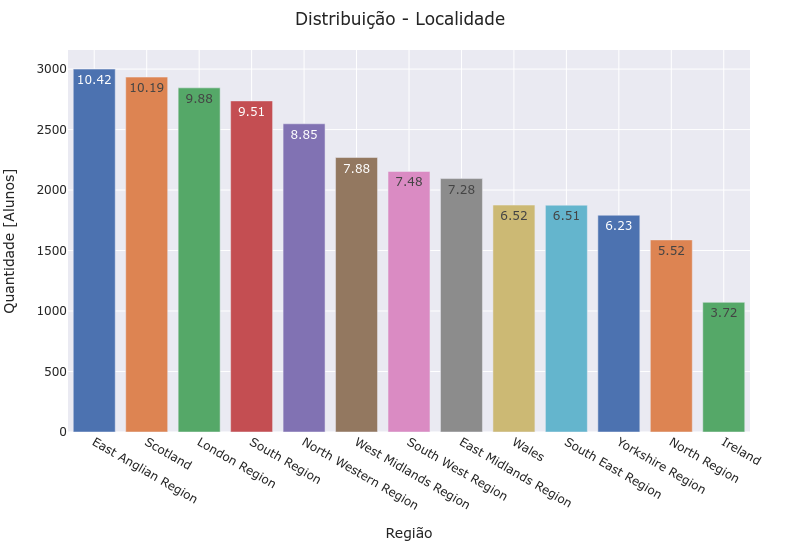

In [45]:
regiao = studentInfo[['region', 'id_student']].drop_duplicates().groupby('region').agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", 'id_student': 'Qtde'}).sort_values(by='Qtde', ascending=False)

regiao['Percentual'] = regiao.apply(lambda x: round(100 * (x['Qtde'] / regiao['Qtde'].sum()), 2) ,axis=1)

fig = px.bar(regiao, x='Regiao', y='Qtde', text='Percentual', color ='Regiao',  template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Localidade',
    xaxis_title="Região",
    yaxis_title="Quantidade [Alunos]",
    showlegend=False,
    width=800, 
    height=550,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)

fig.show("png")

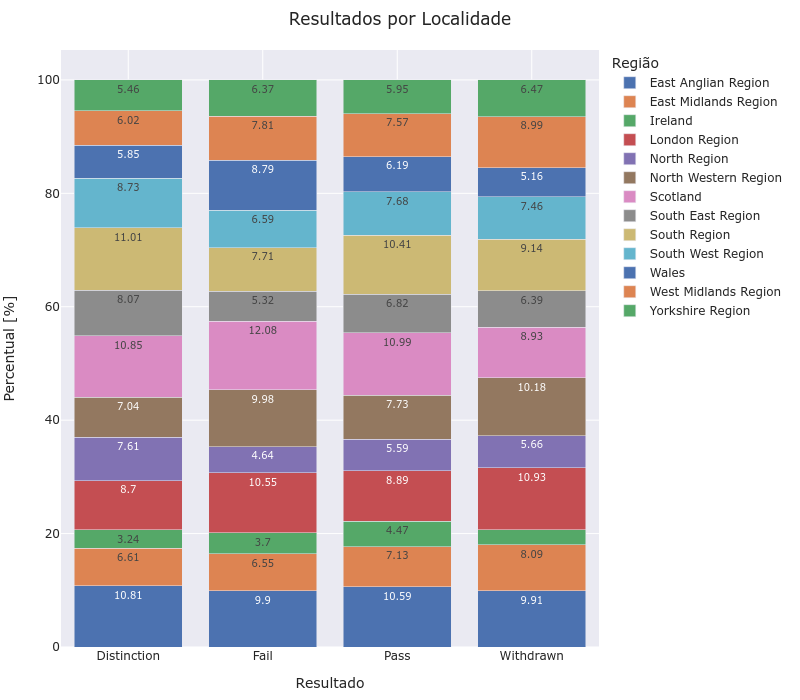

In [42]:
df = studentInfo.groupby(['region', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Regiao",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Localidade',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Região",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

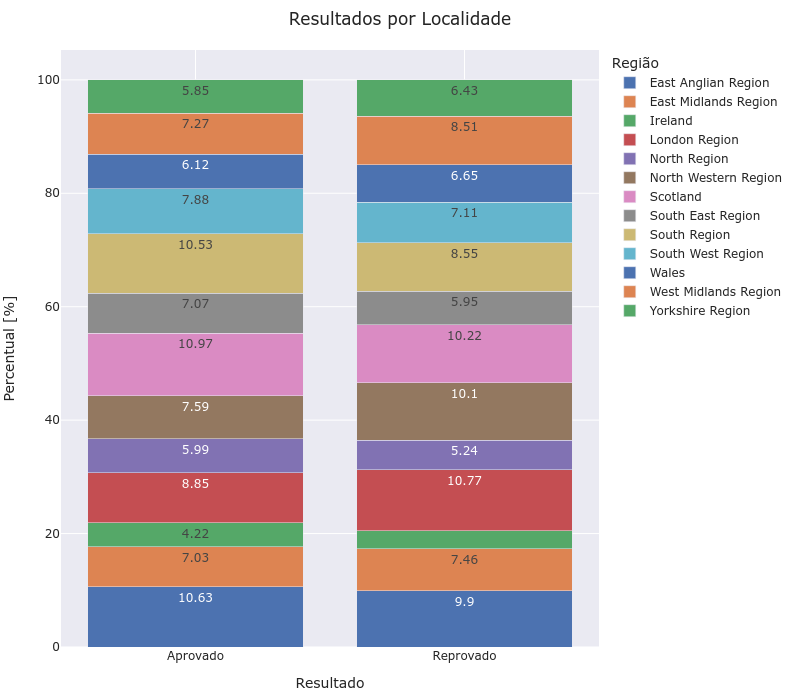

In [44]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['region', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Regiao",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Localidade',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Região",
    width=800, 
    height=700,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
# Analisando o nível de escolaridade

In [21]:
studentInfo['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

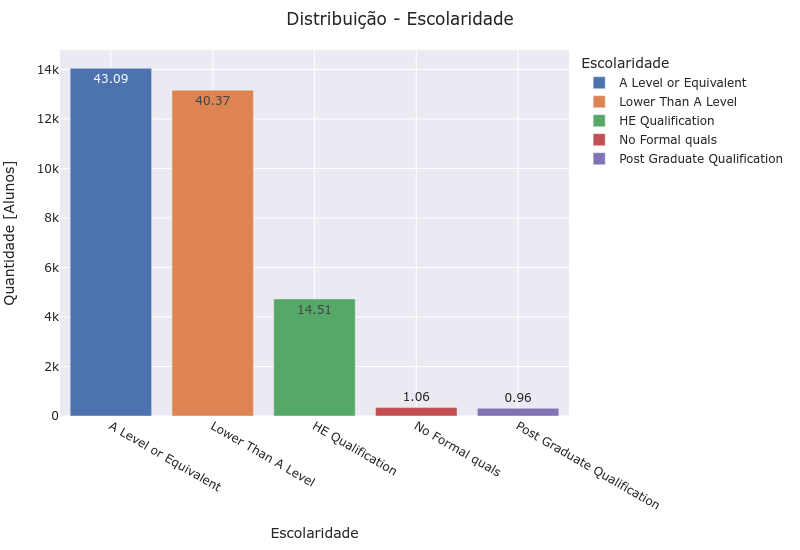

In [22]:
escolaridade = studentInfo.groupby('highest_education').agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", 'id_student': 'Qtde'}).sort_values(by='Qtde', ascending=False)

escolaridade['Percentual'] = escolaridade.apply(lambda x: round(100 * (x['Qtde'] / escolaridade['Qtde'].sum()), 2) ,axis=1)

fig = px.bar(escolaridade, x='Escolaridade', y='Qtde', text='Percentual', color='Escolaridade', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Escolaridade",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

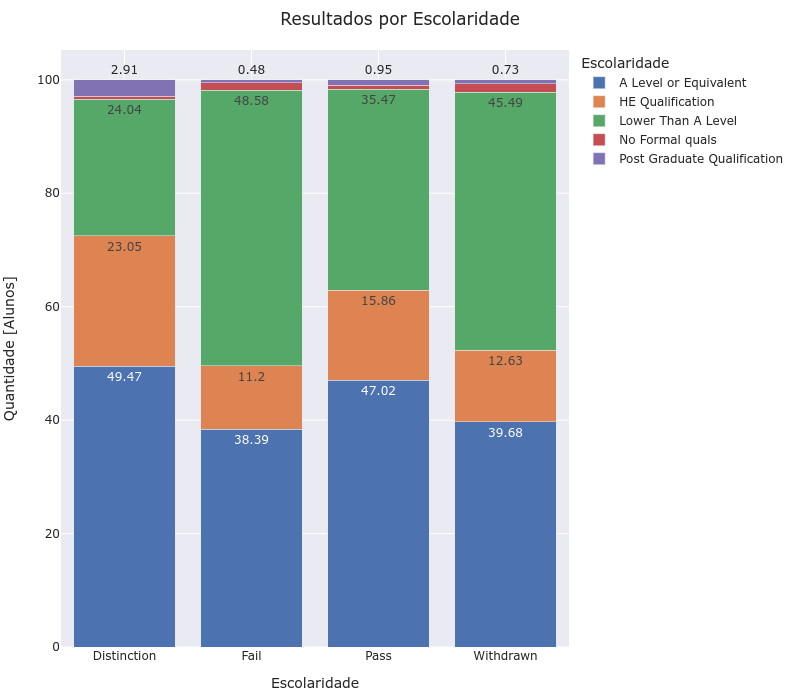

In [23]:
df = studentInfo.groupby(['highest_education', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Escolaridade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Escolaridade",
    width=800, 
    height=700,
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
)
 
fig.show("png")

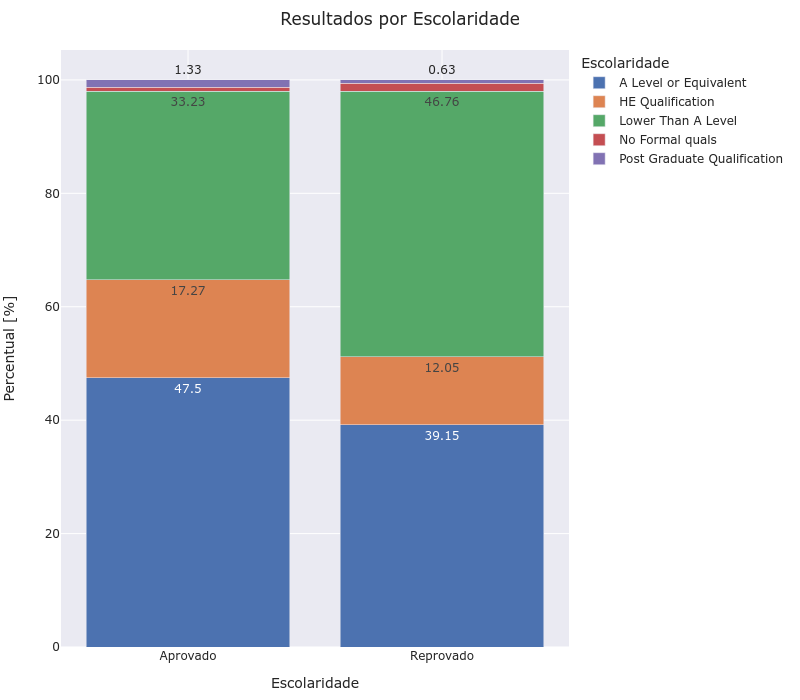

In [46]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['highest_education', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Escolaridade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Percentual [%]",
    legend_title="Escolaridade",
    width=800, 
    height=700,
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
# Analisando o indice

In [47]:
studentInfo['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

## Tratativa para os dados faltantes da feature "imd_band"

* Utilizar a moda da região em questão

In [48]:
studentInfo['imd_band_2'] = studentInfo.apply(lambda x: studentInfo[studentInfo['region']==x['region']]['imd_band'].mode()[0] \
    if pd.isna(x['imd_band']) else x['imd_band'], axis=1)

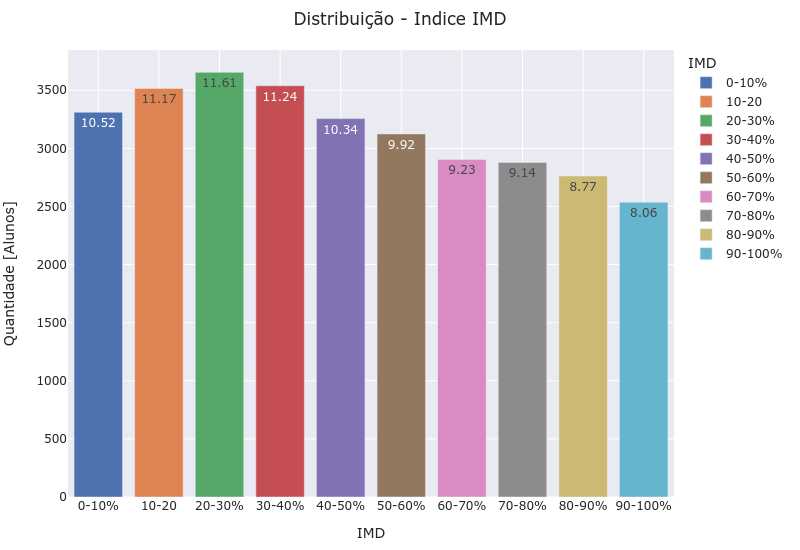

In [49]:
indice = studentInfo.groupby('imd_band').agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band": "Indice", 'id_student': 'Qtde'}).sort_values(by='Indice', ascending=True)

indice['Percentual'] = indice.apply(lambda x:  round(100 * (x['Qtde'] / indice['Qtde'].sum()),2), axis=1)

fig = px.bar(indice, x='Indice', y='Qtde', text='Percentual', color='Indice', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Indice IMD',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show("png")

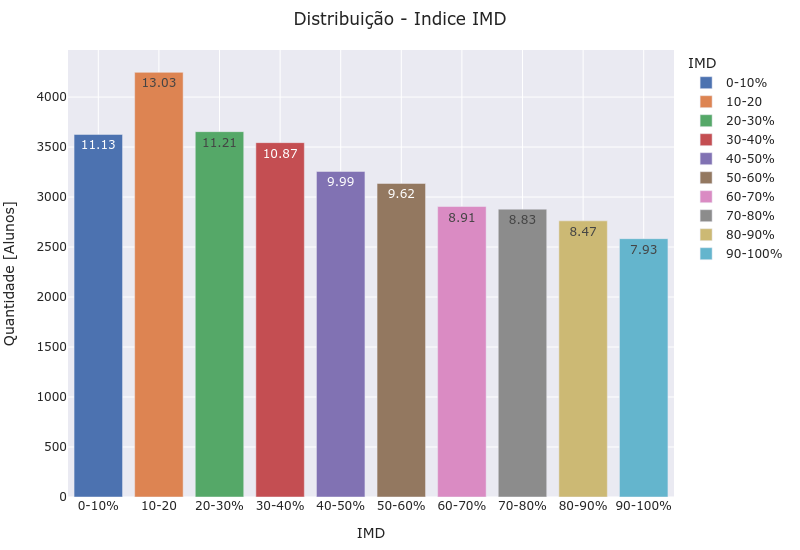

In [50]:
indice = studentInfo.groupby('imd_band_2').agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band_2": "Indice", 'id_student': 'Qtde'}).sort_values(by='Indice', ascending=True)

indice['Percentual'] = indice.apply(lambda x:  round(100 * (x['Qtde'] / indice['Qtde'].sum()),2), axis=1)

fig = px.bar(indice, x='Indice', y='Qtde', text='Percentual', color='Indice', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Indice IMD',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show("png")

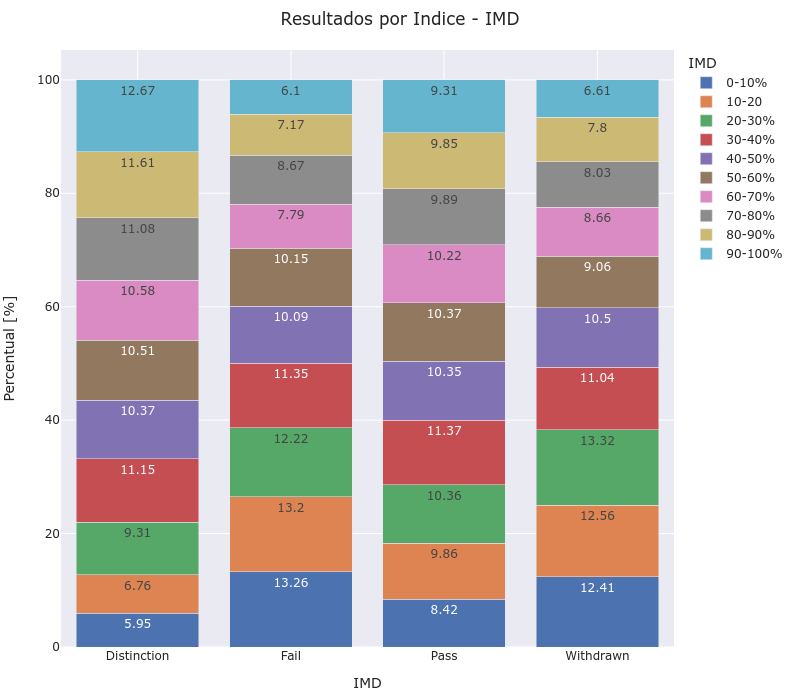

In [53]:
df = studentInfo.groupby(['imd_band', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band": "Indice", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Indice",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Indice - IMD',
    xaxis_title="IMD",
    yaxis_title="Percentual [%]",
    legend_title="IMD",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

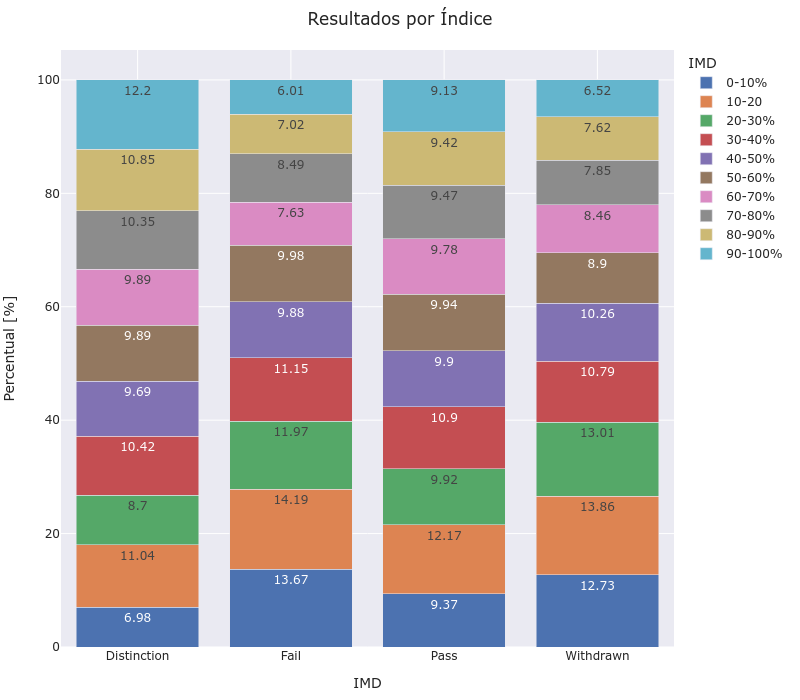

In [54]:
df = studentInfo.groupby(['imd_band_2', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band_2": "Indice", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Indice",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Índice',
    xaxis_title="IMD",
    yaxis_title="Percentual [%]",
    legend_title="IMD",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

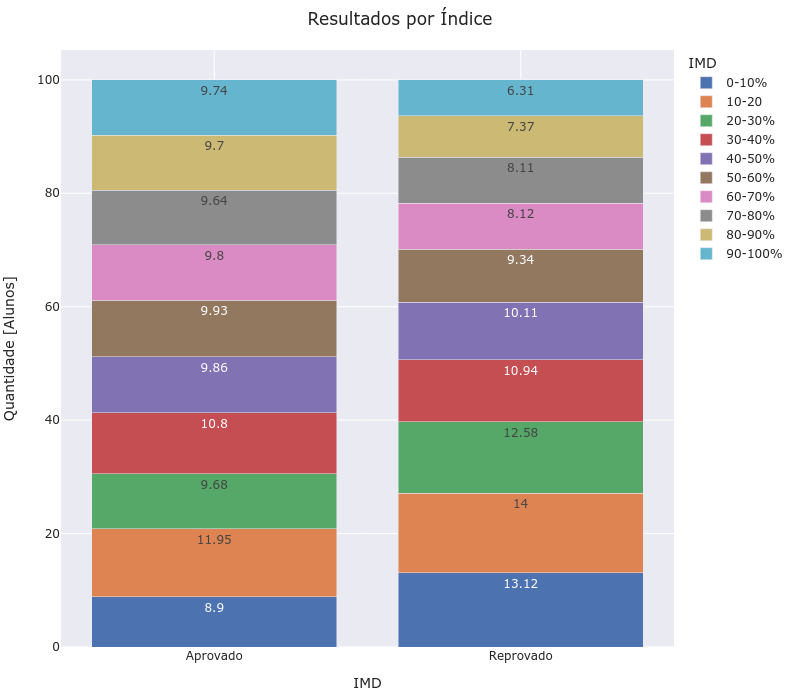

In [55]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['imd_band_2', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band_2": "Indice", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Indice",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Índice',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
# Analisando a idade

In [56]:
studentInfo['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)

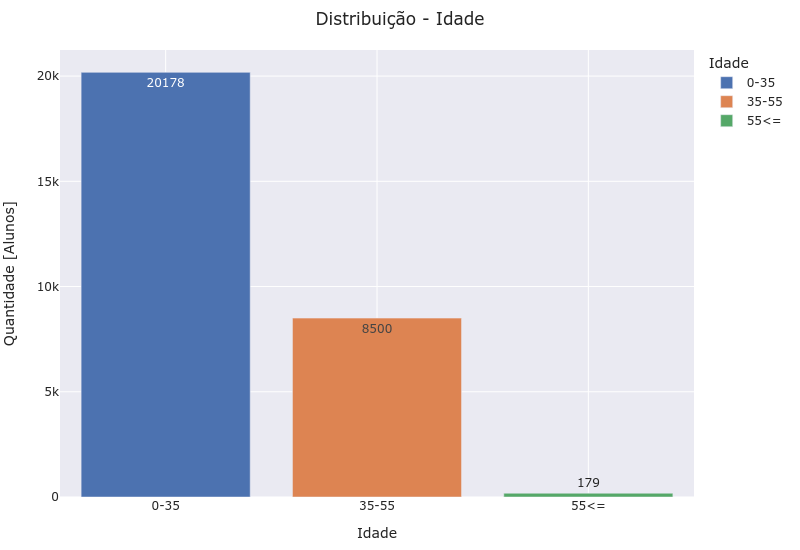

In [60]:
idade = studentInfo[['age_band', 'id_student']].drop_duplicates().groupby('age_band').agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", 'id_student': 'Qtde'}).sort_values(by='Idade', ascending=True)

idade['Percentual'] = idade.apply(lambda x:  round(100 * (x['Qtde'] / idade['Qtde'].sum()),2), axis=1)

fig = px.bar(idade, x='Idade', y='Qtde', text='Qtde', color='Idade', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Idade',
    xaxis_title="Idade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Idade",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show("png")

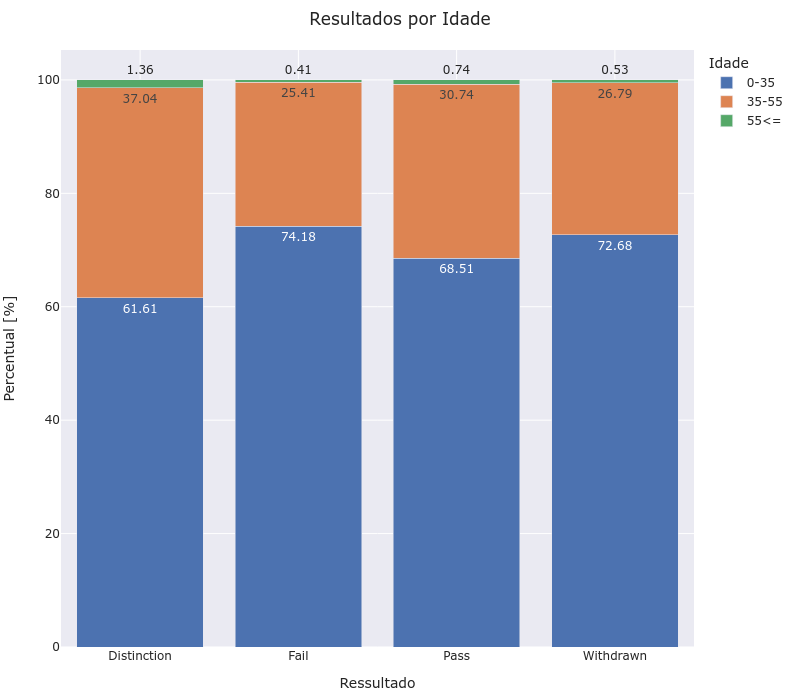

In [61]:
df = studentInfo.groupby(['age_band', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] ==\
     x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Idade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Idade',
    xaxis_title="Ressultado",
    yaxis_title="Percentual [%]",
    legend_title="Idade",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

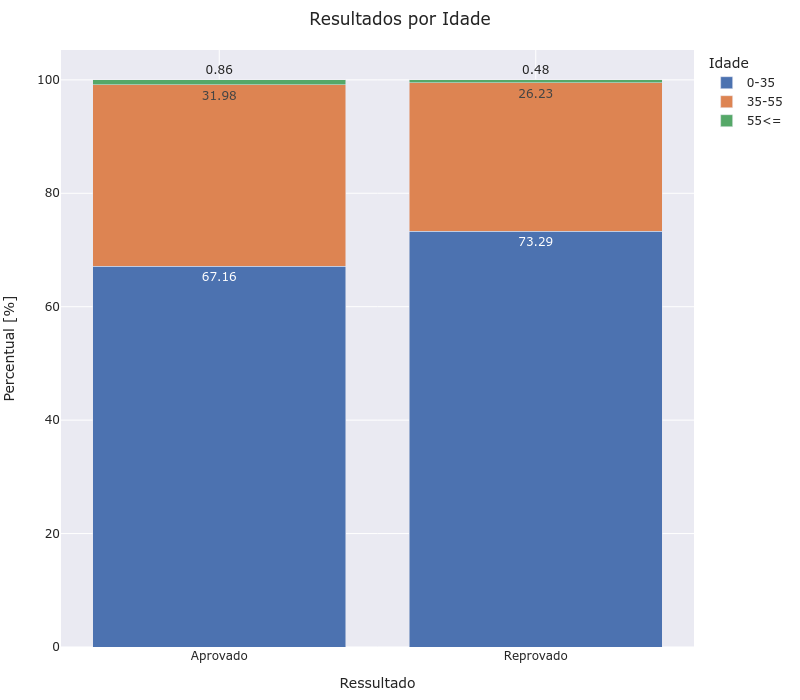

In [62]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['age_band', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Idade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Idade',
    xaxis_title="Ressultado",
    yaxis_title="Percentual [%]",
    legend_title="Idade",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")


____
# Analisando por tentativas anteriores

In [63]:
studentInfo['num_of_prev_attempts'].unique()

array([0, 1, 2, 4, 3, 5, 6])

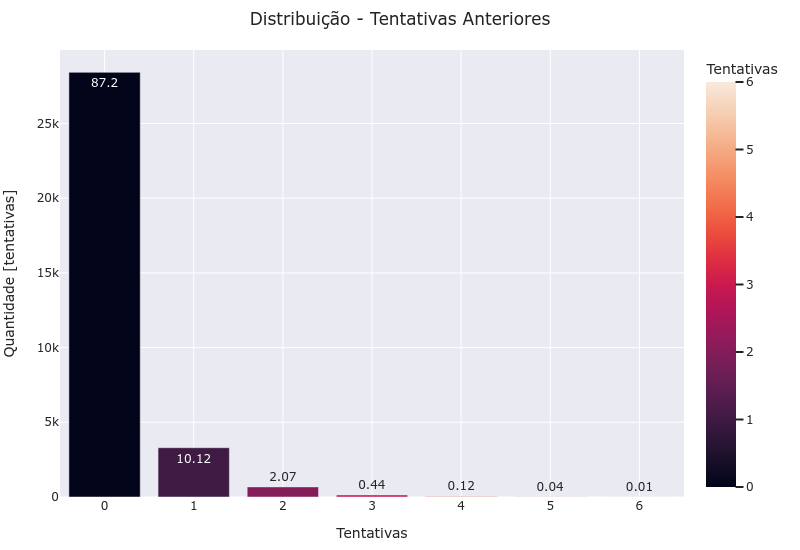

In [64]:
tentat = studentInfo.groupby('num_of_prev_attempts').agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", 'id_student': 'Qtde'}).sort_values(by='Tentativas', ascending=True)

tentat['Percentual'] = tentat.apply(lambda x:  round(100 * (x['Qtde'] / tentat['Qtde'].sum()),2), axis=1)

fig = px.bar(tentat, x='Tentativas', y='Qtde', text='Percentual', color='Tentativas', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Tentativas Anteriores',
    xaxis_title="Tentativas",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

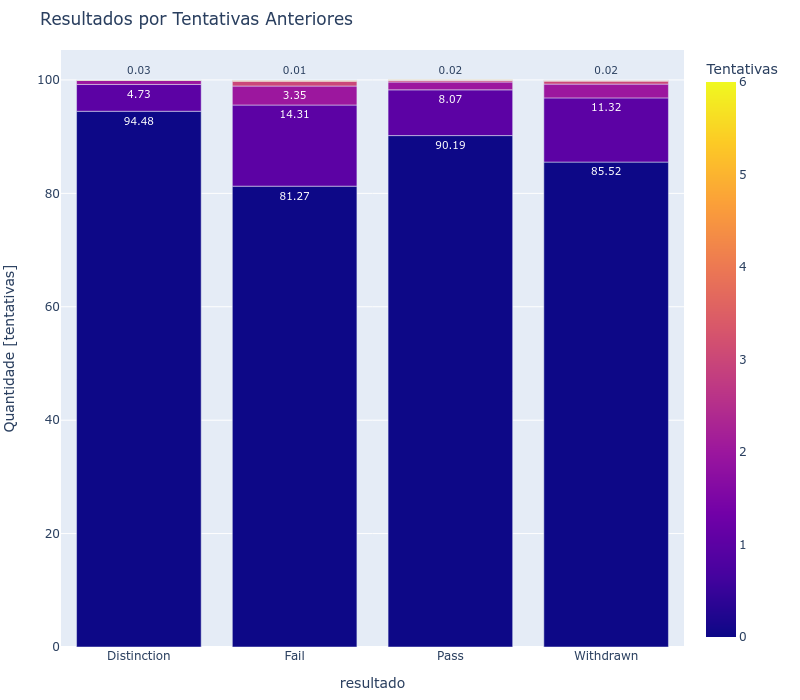

In [65]:
df = studentInfo.groupby(['num_of_prev_attempts', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Tentativas",
            hover_data=['Percentual'], barmode = 'stack')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores',
    xaxis_title="resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

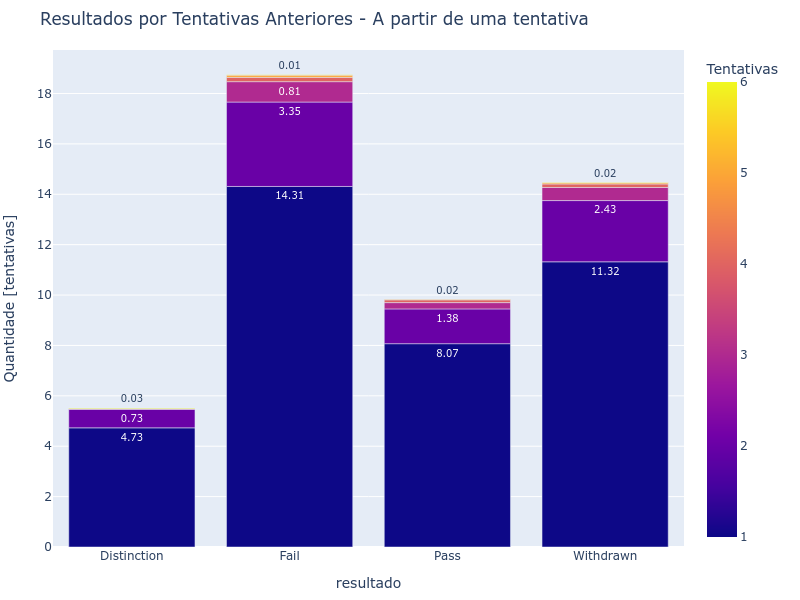

In [66]:
fig = px.bar(df[df['Tentativas'] != 0], x="Resultado", y="Percentual", text="Percentual", color="Tentativas",
            hover_data=['Percentual'], barmode = 'stack')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores - A partir de uma tentativa',
    xaxis_title="resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=600,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)

fig.show("png")

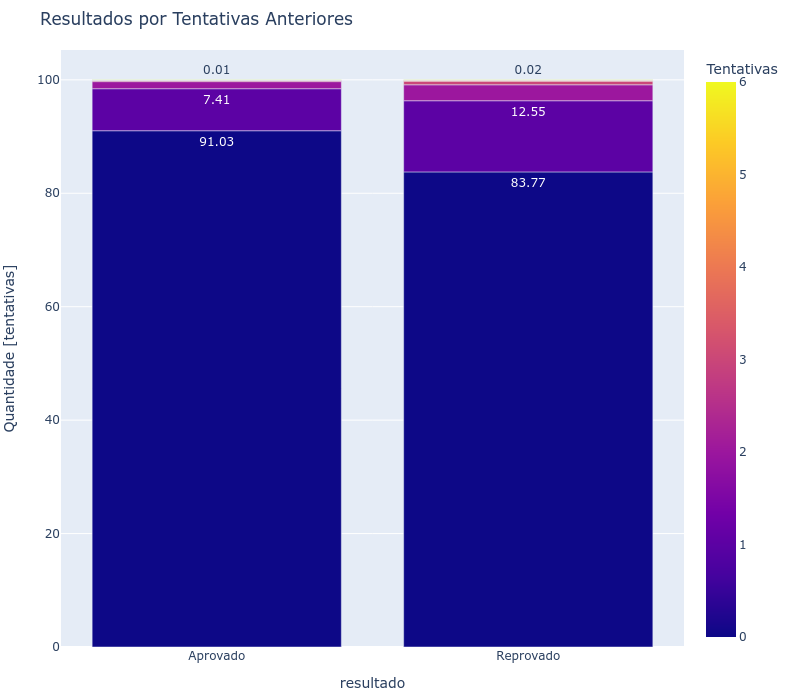

In [67]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['num_of_prev_attempts', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Tentativas",
            hover_data=['Percentual'], barmode = 'stack')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores',
    xaxis_title="resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

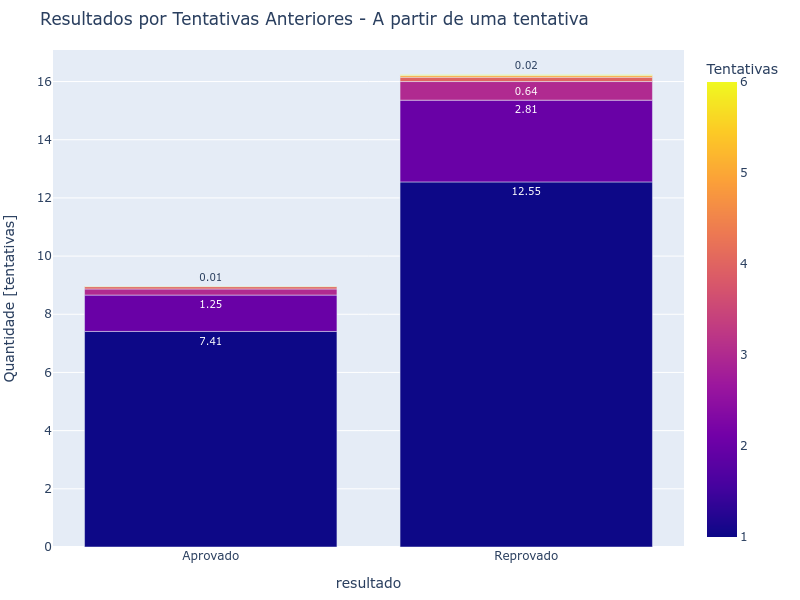

In [68]:
fig = px.bar(df[df['Tentativas'] != 0], x="Resultado", y="Percentual", text="Percentual", color="Tentativas",
            hover_data=['Percentual'], barmode = 'stack')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores - A partir de uma tentativa',
    xaxis_title="resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=600,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)

fig.show("png")

____
# Analisando por créditos concluídos

In [69]:
studentInfo['studied_credits'].unique().max()

655

In [70]:
studentInfo['studied_credits'].unique().min()

30

In [71]:
studentInfo['studied_credits'].sort_values().unique()

array([ 30,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95,
       100, 105, 110, 115, 120, 130, 135, 140, 145, 150, 155, 160, 165,
       170, 175, 180, 190, 195, 200, 205, 210, 215, 220, 225, 235, 240,
       250, 255, 270, 280, 300, 310, 315, 325, 330, 345, 355, 360, 370,
       390, 400, 420, 430, 480, 540, 585, 630, 655])

In [72]:
#criando faixas de creditos
studentInfo['cred_bin'] = studentInfo.apply(lambda x: '1.Até 100 creditos' if x['studied_credits'] <= 100 else \
    ('2.De 100 a 200 creditos'if x['studied_credits'] > 100 and x['studied_credits'] <= 200 \
        else ('3.De 200 a 300 creditos'if x['studied_credits'] > 200 and x['studied_credits'] <= 300 \
            else ('4.De 300 a 400 creditos'if x['studied_credits'] > 300 and x['studied_credits'] <= 400 else '5.Acima de 400 creditos'))), axis=1)

In [73]:
cred = studentInfo.groupby('cred_bin').agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "Creditos", 'id_student': 'Qtde'}).sort_values(by='Creditos', ascending=True)


cred = cred.sort_values(by='Creditos')

fig = px.bar(cred, x='Qtde', y='Creditos', color='Creditos', text='Qtde', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Creditos Cursados',
    xaxis_title="Quantidade [Alunos]",
    yaxis_title="Créditos",
    legend_title="Intervalos de Créditos",
    width=800, 
    height=550,
    
)
fig.show()

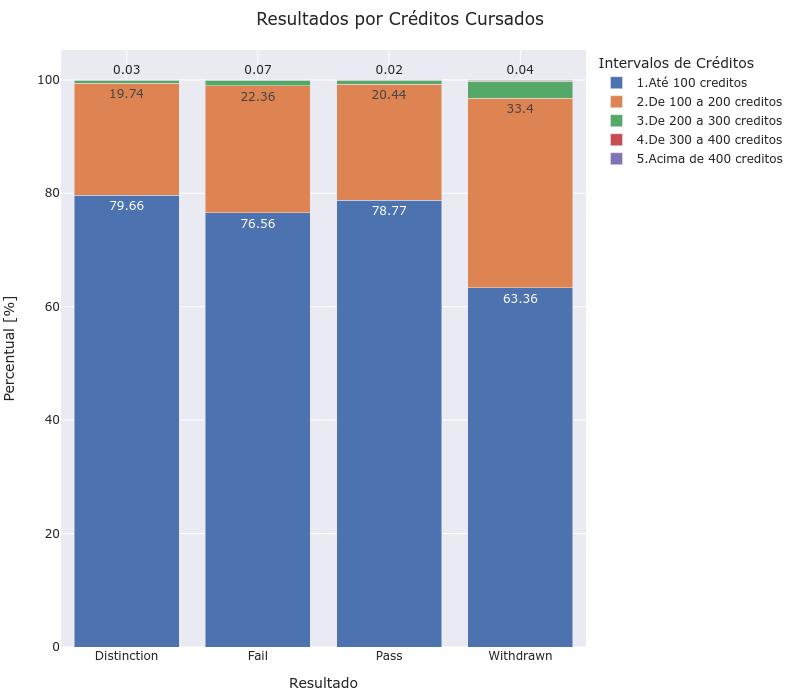

In [74]:
df = studentInfo.groupby(['cred_bin', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "FaixasCredito", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="FaixasCredito",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Créditos Cursados',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Intervalos de Créditos",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

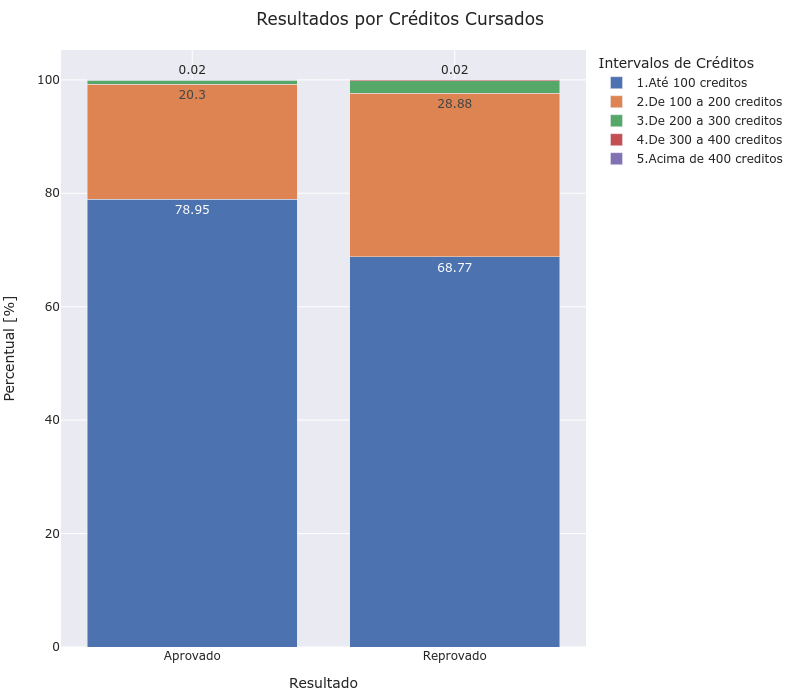

In [75]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['cred_bin', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "FaixasCredito", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="FaixasCredito",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Créditos Cursados',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Intervalos de Créditos",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
# Analisando por deficiêcia declarada

In [76]:
studentInfo['disability'].unique()

array(['N', 'Y'], dtype=object)

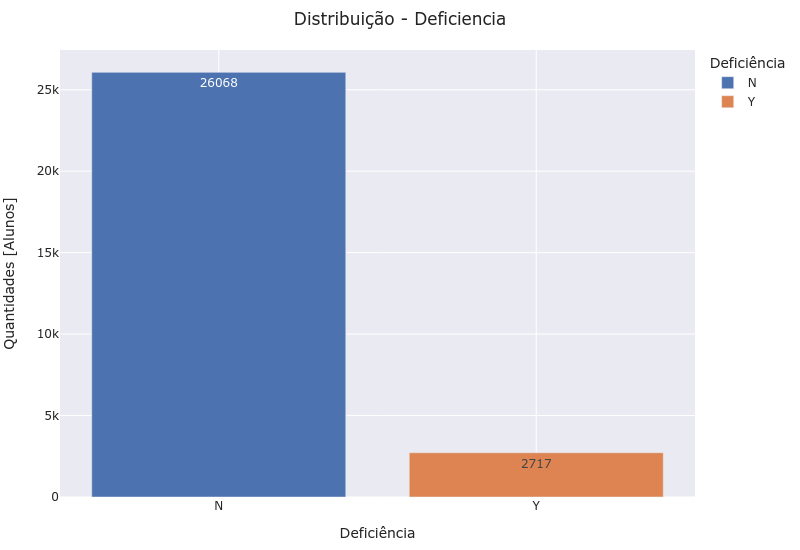

In [78]:
defci = studentInfo[['disability', 'id_student']].drop_duplicates().groupby('disability').agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", 'id_student': 'Qtde'}).sort_values(by='Deficiencia', ascending=True)

defci['Percentual'] = defci.apply(lambda x:  round(100 * (x['Qtde'] / defci['Qtde'].sum()),2), axis=1)

fig = px.bar(defci, x='Deficiencia', y='Qtde', text='Qtde', template="seaborn", color='Deficiencia')
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Deficiencia',
    xaxis_title="Deficiência",
    yaxis_title="Quantidades [Alunos]",
    legend_title="Deficiência",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

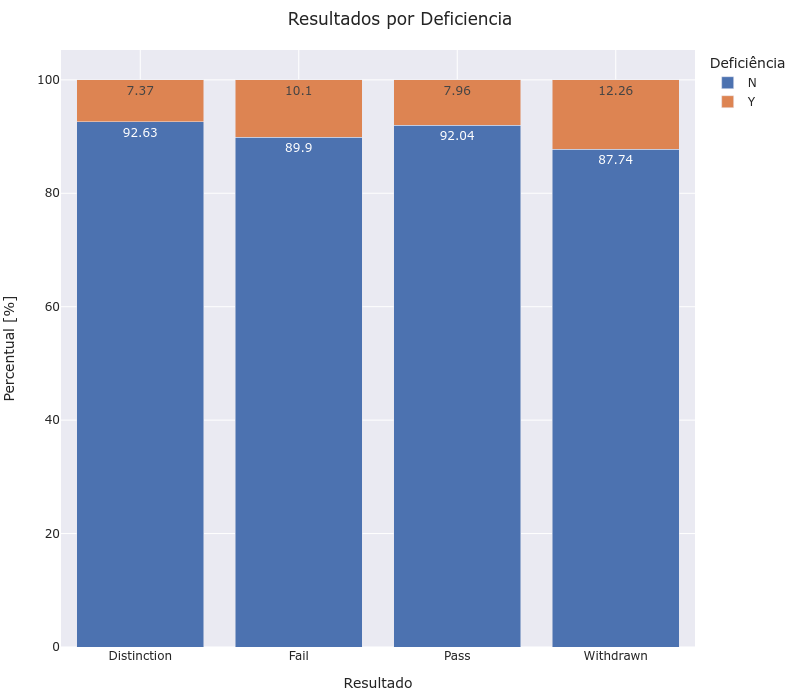

In [51]:
df = studentInfo.groupby(['disability', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="Deficiencia", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Deficiencia',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Deficiência",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

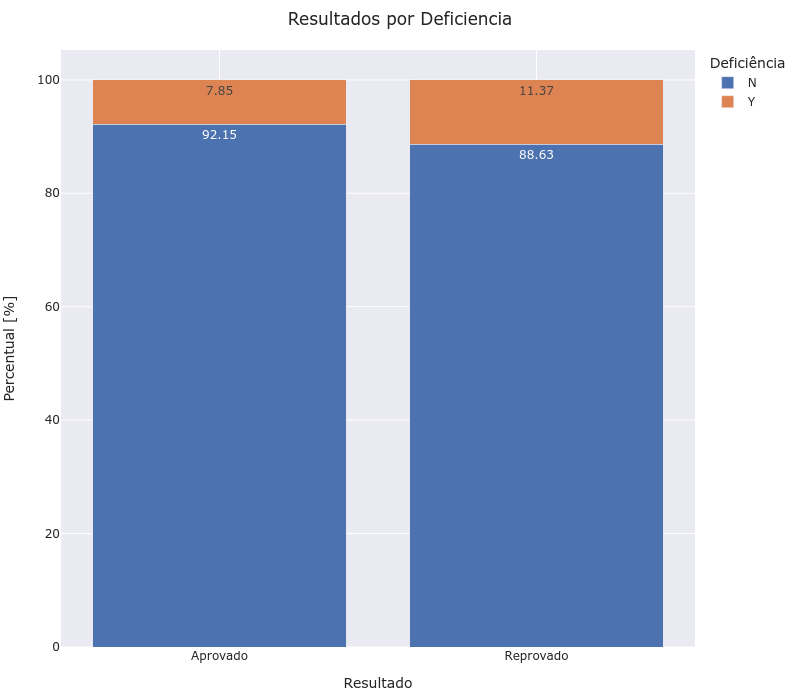

In [79]:
# RESULTADO BINÁRIO - Aprovado e Reprovado
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

df = studentInfo.groupby(['disability', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="Deficiencia", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Deficiencia',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Deficiência",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

# Analisando informações de estudo AVA

* studentVle.csv - contém informações sobre as interações de cada aluno com os materiais no AVA


* vle.csv - contém informações sobre os materiais disponíveis no AVA. Normalmente, são páginas html, arquivos PDF, etc

In [169]:
studentVle = pd.read_csv('data/studentVle.csv', sep=',', encoding='ISO-8859-1')

vle = pd.read_csv('data/vle.csv', sep=',', encoding='ISO-8859-1')

In [170]:
#cria um merge entre studentVle(todos os campos) e vle(activity_type)
studentVle_vle = studentVle.merge(vle[['id_site', 'activity_type']], on='id_site', how='left')

In [171]:
#tentativa de associar a data de acesso  variavel sum-click
studentVle_vle['sum_click_2'] = round(studentVle_vle['sum_click'] / abs(studentVle_vle['date'] / 10),2)
studentVle_vle = studentVle_vle.replace([np.inf, -np.inf], np.nan)

In [172]:
#cria o dataframe auxiliar com todas as activity_type somadas do estudante
aux = studentVle_vle.groupby(['id_student', 'code_module', 'code_presentation',\
     'activity_type'])['sum_click'].sum().unstack().fillna(0).reset_index()

In [173]:
#merge entre as informações do estudante e as activity_type
df = studentInfo.merge(aux, on=['id_student','code_module', 'code_presentation'], how='left')

df[['dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']] = \
              df[['dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']].fillna(0)

In [174]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'final_result_2',
       'imd_band_2', 'cred_bin', 'dataplus', 'dualpane', 'externalquiz',
       'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity',
       'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page',
       'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage',
       'subpage', 'url'],
      dtype='object')

In [175]:
assessments = pd.read_csv('data/assessments.csv', sep=',', encoding='ISO-8859-1')

studentAssessment = pd.read_csv('data/studentAssessment.csv', sep=',', encoding='ISO-8859-1')

In [176]:
#cria um merge entre studentVle(todos os campos) e vle(activity_type)
assessments_group = studentAssessment.merge(assessments[['id_assessment', 'weight']], on='id_assessment', how='left')
assessments_group = assessments_group.merge(studentInfo[['id_student', 'code_module', 'code_presentation',\
    'final_result']], on='id_student', how='left')

In [177]:
assessments_group['nota'] = (assessments_group['score']/100) * assessments_group['weight']

# Featuring

## Objetivo de confirmar as analises feitas nos gráficos e selecionar as caracteristicas qie mais impactam no resultado final

In [178]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

In [179]:
LE = LabelEncoder()

In [180]:
#studentInfoDumm = studentInfo.copy()
#studentInfoDumm = df.dropna().copy()
studentInfoDumm = df.copy()

colunas = ['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'imd_band_2', 'age_band', 'disability', 'cred_bin', 'final_result', 'final_result_2']

for col in colunas:
       studentInfoDumm[col] = LE.fit_transform(studentInfoDumm[col])


In [181]:
len(studentInfoDumm)

32593

In [182]:
X = studentInfoDumm[['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band_2', 'age_band', 'num_of_prev_attempts', 'disability', 'cred_bin']]

X_ = studentInfoDumm[['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band_2', 'age_band', 'num_of_prev_attempts',
       'disability', 'cred_bin', 'dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']]

Y = studentInfoDumm[['final_result']]
Y_ = studentInfoDumm[['final_result_2']]

## Selecionando as features sem considerar as informações de estudo AVA

In [183]:
selection = ExtraTreesClassifier()
selection.fit(X,Y_)

ExtraTreesClassifier()

In [184]:
feature_list = list(['code_module', 'code_presentation', 'gender', 'region', 'highest_education',
'imd_band_2', 'age_band', 'num_of_prev_attempts', 'disability', 'cred_bin'])

In [185]:
importances = list(selection.feature_importances_)

feature_importances = [(feature, round(importance * 100, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
[print('Variavel: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances]

Variavel: region               Importancia: 34.74
Variavel: imd_band_2           Importancia: 19.73
Variavel: code_module          Importancia: 12.27
Variavel: code_presentation    Importancia: 10.72
Variavel: highest_education    Importancia: 7.08
Variavel: num_of_prev_attempts Importancia: 4.45
Variavel: cred_bin             Importancia: 4.06
Variavel: age_band             Importancia: 3.14
Variavel: gender               Importancia: 2.51
Variavel: disability           Importancia: 1.31


[None, None, None, None, None, None, None, None, None, None]

In [186]:
feat01 = pd.DataFrame(feature_importances, columns=['Variavel', 'Importancia'])

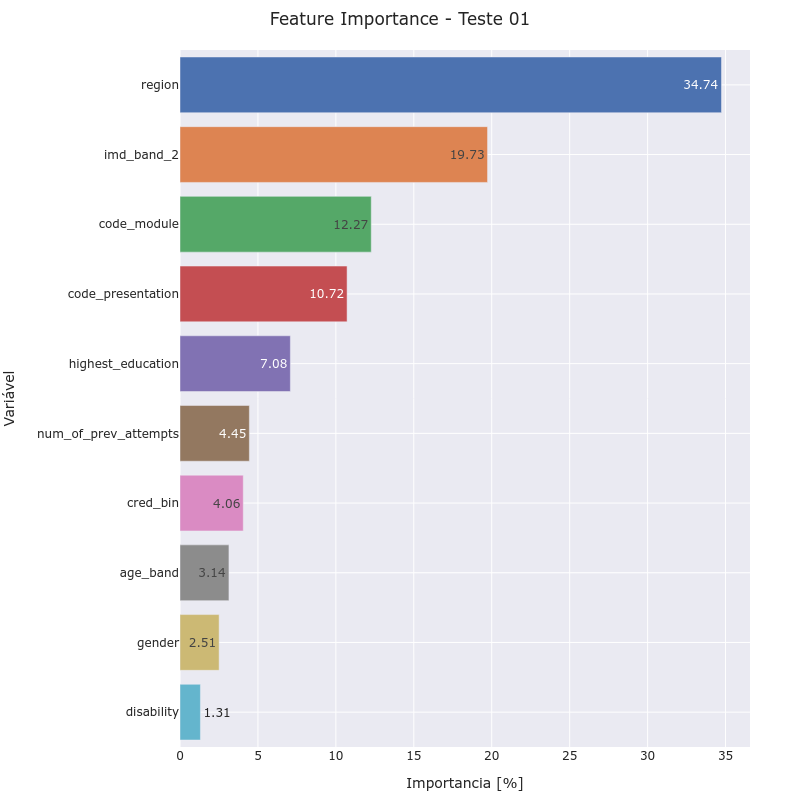

In [187]:
fig = px.bar(feat01, x="Importancia", y="Variavel", color="Variavel", text='Importancia', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Feature Importance - Teste 01',
    showlegend=False,
    xaxis_title="Importancia [%]",
    yaxis_title="Variável",
    legend_title="Deficiência",
    width=800, 
    height=800,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig.show("png")

## Selecionando as features considerando as informações de estudo AVA

In [188]:
selection = ExtraTreesClassifier()
selection.fit(X_,Y_)

importances = selection.feature_importances_

In [189]:
feature_list = list(['code_module', 'code_presentation', 'gender', 'region',
'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
'disability', 'cred_bin', 'dataplus', 'dualpane', 
'externalquiz', 'folder', 'forumng', 'glossary', 
'homepage', 'htmlactivity', 'oucollaborate','oucontent', 
'ouelluminate', 'ouwiki', 'page', 'questionnaire', 
'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 
'subpage', 'url'])

In [190]:
importances = list(selection.feature_importances_)

feature_importances = [(feature, round(importance * 100, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
[print('Variavel: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances[:15]]

Variavel: homepage             Importancia: 10.46
Variavel: quiz                 Importancia: 10.06
Variavel: oucontent            Importancia: 9.41
Variavel: subpage              Importancia: 8.85
Variavel: forumng              Importancia: 7.35
Variavel: resource             Importancia: 6.04
Variavel: url                  Importancia: 5.57
Variavel: code_module          Importancia: 4.82
Variavel: ouwiki               Importancia: 4.13
Variavel: oucollaborate        Importancia: 3.59
Variavel: imd_band             Importancia: 2.97
Variavel: region               Importancia: 2.84
Variavel: code_presentation    Importancia: 2.38
Variavel: questionnaire        Importancia: 2.37
Variavel: page                 Importancia: 2.32


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [191]:
feat02 = pd.DataFrame(feature_importances, columns=['Variavel', 'Importancia'])

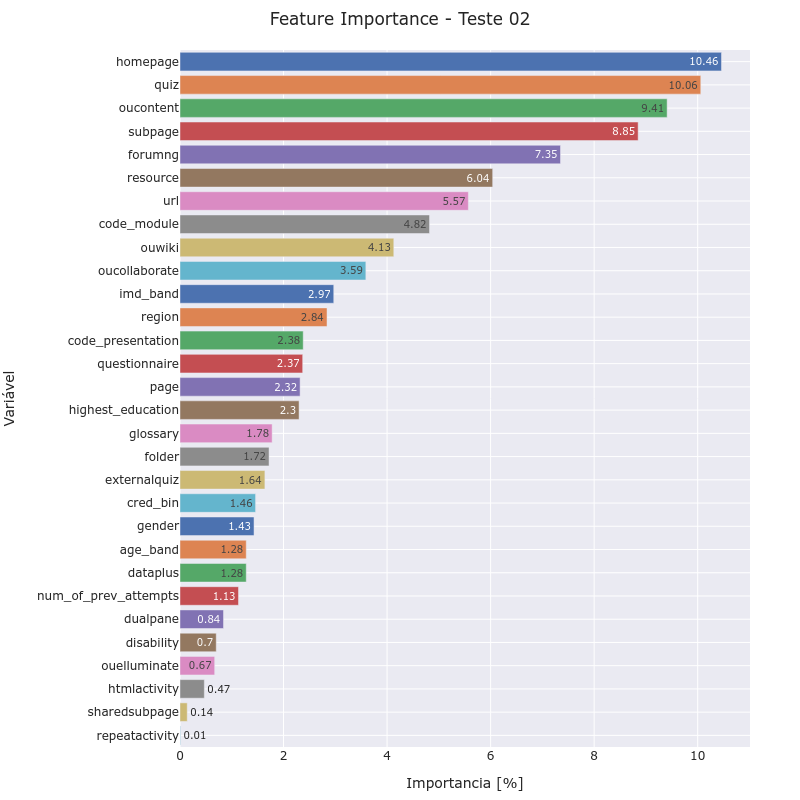

In [192]:
fig = px.bar(feat02, x="Importancia", y="Variavel", color="Variavel", text='Importancia', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Feature Importance - Teste 02',
    showlegend=False,
    xaxis_title="Importancia [%]",
    yaxis_title="Variável",
    legend_title="Deficiência",
    width=800, 
    height=800,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

In [193]:
X_new = X_.copy()

In [194]:
x_train_new, x_test_new, y_train, y_test = train_test_split(X_new, Y_, test_size=0.2, random_state=0)
model1_2 = ExtraTreesClassifier()
model1_2.fit(x_train_new, y_train)
predictions_2 = model1_2.predict(x_test_new)
accuracy_score(y_test, predictions_2)

0.8743672342383801

In [195]:
#RF
model1_3 = RandomForestClassifier()
model1_3.fit(x_train_new, y_train)
predictions_3 = model1_3.predict(x_test_new)
accuracy_score(y_test, predictions_3)

0.8826507132995858

# Analise das features

In [196]:
df_ = df[['final_result', 'final_result_2', 'quiz', 'homepage', 'oucontent']]

In [197]:
bins = [-1, 100, 300, 500, 1000, 5000]
labels = ["0 a 100","100 a 300","300 a 500","500 a 1000","Acima de 1000"]
df_['quiz_binned'] = pd.cut(df_['quiz'], bins=bins, labels=labels)
df_['homepage_binned'] = pd.cut(df_['homepage'], bins=bins, labels=labels)
df_['oucontent_binned'] = pd.cut(df_['oucontent'], bins=bins, labels=labels)

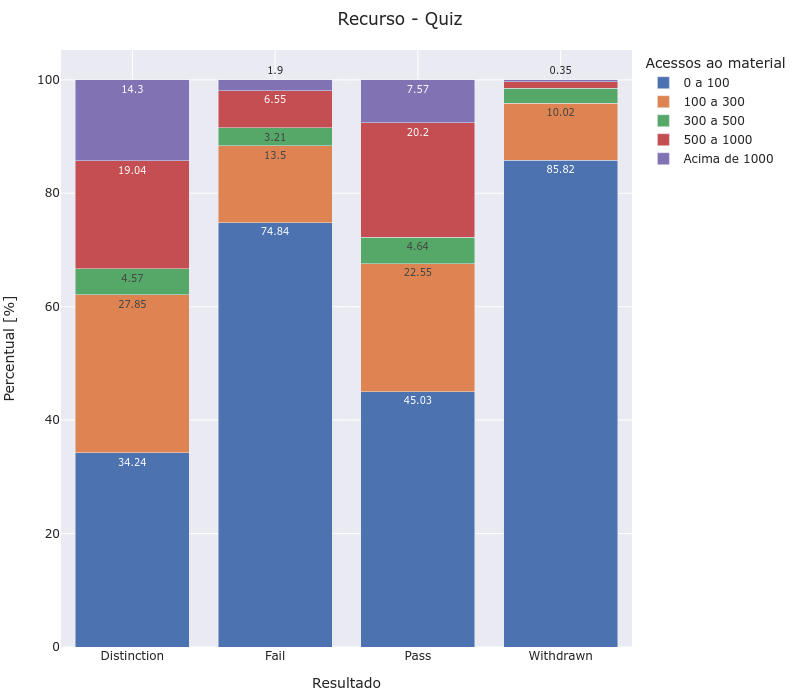

In [198]:
df = df_.groupby(['quiz_binned', 'final_result']).agg({'quiz':'count'}).reset_index().\
    rename(columns={"quiz_binned": "quiz", "final_result": 'Resultado','quiz': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="quiz", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Recurso - Quiz',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Acessos ao material",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

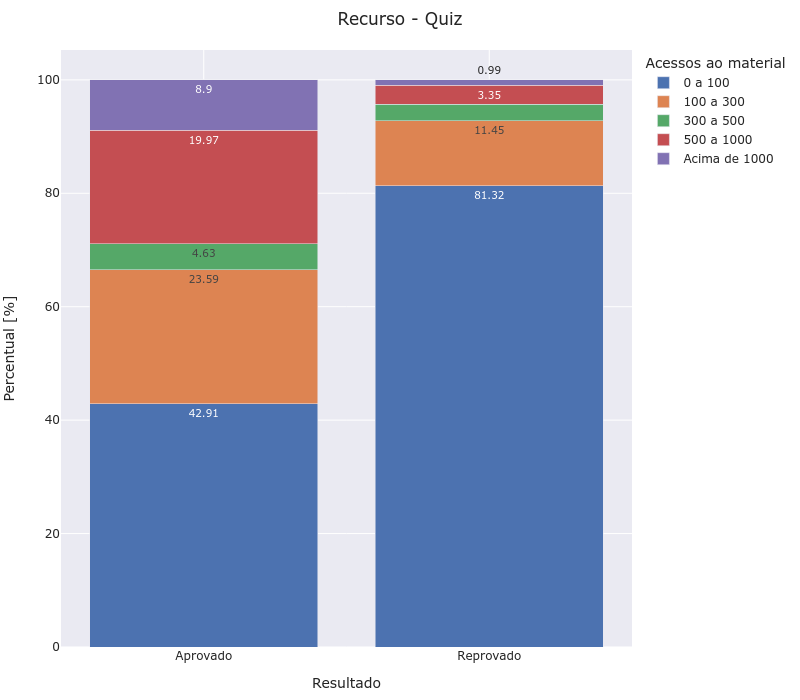

In [199]:
df = df_.groupby(['quiz_binned', 'final_result_2']).agg({'quiz':'count'}).reset_index().\
    rename(columns={"quiz_binned": "quiz", "final_result_2": 'Resultado','quiz': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="quiz", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Recurso - Quiz',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Acessos ao material",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

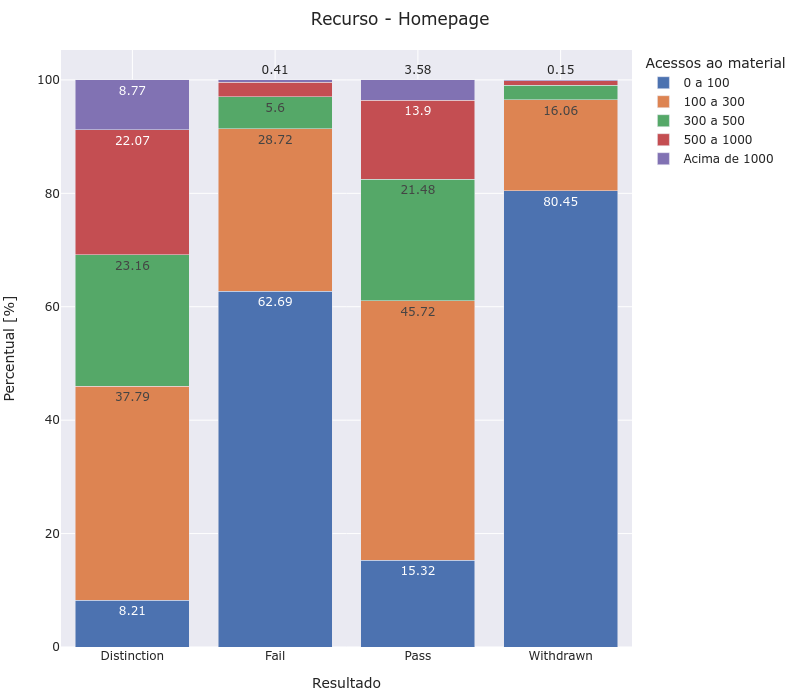

In [200]:
df = df_.groupby(['homepage_binned', 'final_result']).agg({'quiz':'count'}).reset_index().\
    rename(columns={"homepage_binned": "homepage", "final_result": 'Resultado','quiz': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="homepage", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Recurso - Homepage',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Acessos ao material",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

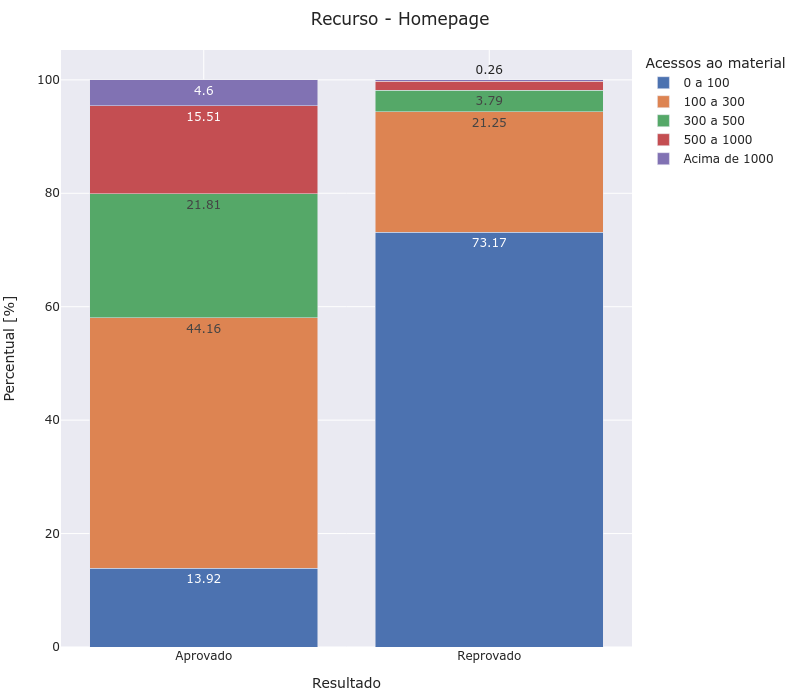

In [201]:
df = df_.groupby(['homepage_binned', 'final_result_2']).agg({'quiz':'count'}).reset_index().\
    rename(columns={"homepage_binned": "homepage", "final_result_2": 'Resultado','quiz': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="homepage", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Recurso - Homepage',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Acessos ao material",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

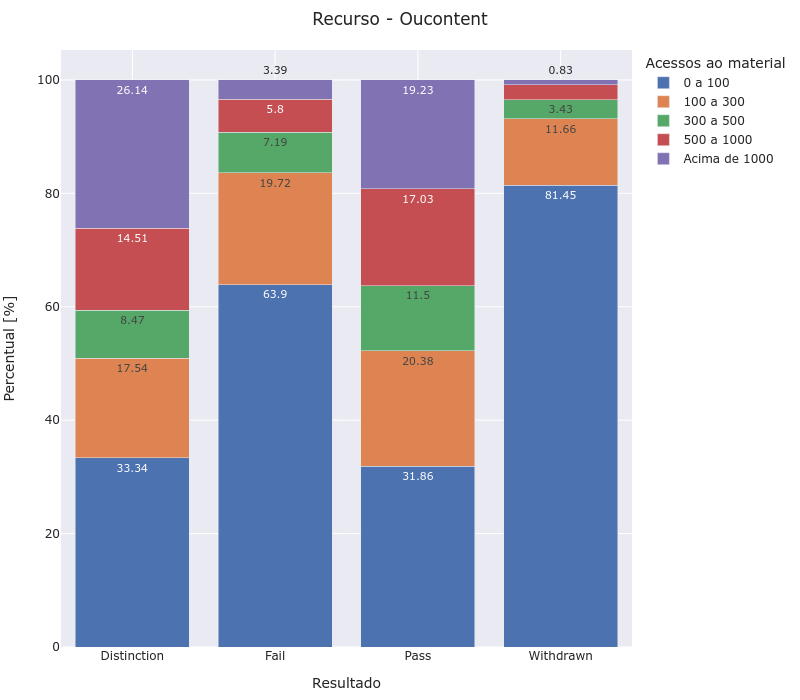

In [202]:
df = df_.groupby(['oucontent_binned', 'final_result']).agg({'quiz':'count'}).reset_index().\
    rename(columns={"oucontent_binned": "oucontent", "final_result": 'Resultado','quiz': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="oucontent", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Recurso - Oucontent',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Acessos ao material",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

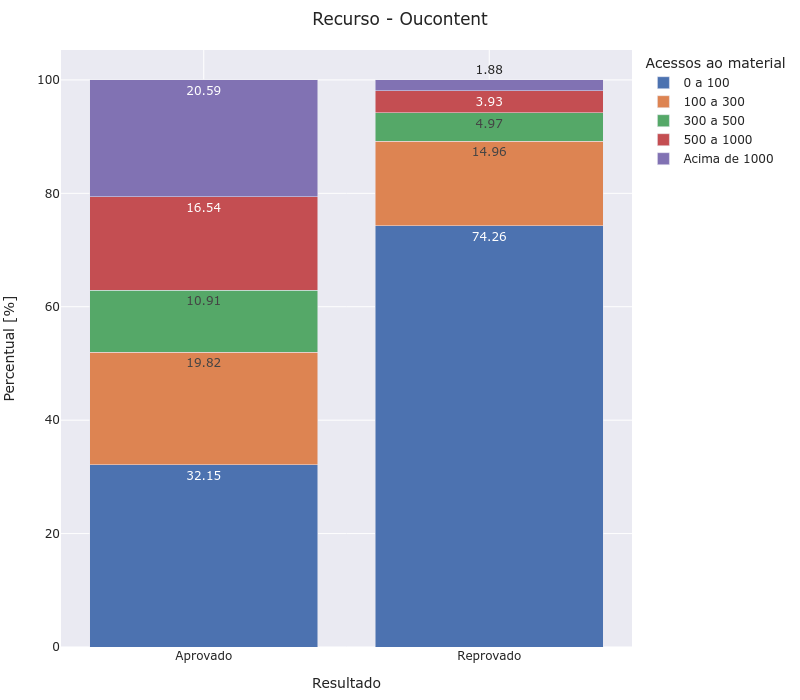

In [203]:
df = df_.groupby(['oucontent_binned', 'final_result_2']).agg({'quiz':'count'}).reset_index().\
    rename(columns={"oucontent_binned": "oucontent", "final_result_2": 'Resultado','quiz': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="oucontent", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Recurso - Oucontent',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Acessos ao material",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")